In [1]:
from VX_whisper import VX_whisper
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import audiofile as af

SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


## Example - "Red Wheel" - random phase

In [2]:
inputFile = 'audios\\redwheel.wav'
s_win=512
n1=s_win//8
n2=n1

x, fs = af.read(inputFile)
auxName = inputFile.split('.wav')[0]

y = VX_whisper(x,s_win,n1,n2,'phase')
af.write(auxName+'_whisper_phase.wav',y,fs)

Elapsed time is 0.333635 seconds.


## Example - "Red Wheel" - random magnitude

In [3]:
inputFile = 'audios\\redwheel.wav'
s_win=512
n1=s_win//8
n2=n1

x, fs = af.read(inputFile)
auxName = inputFile.split('.wav')[0]

y = VX_whisper(x,s_win,n1,n2,'magnitude')
af.write(auxName+'_whisper_mag.wav',y,fs)

Elapsed time is 0.303211 seconds.


## Example - "Red Wheel" -  s_win=64

In [4]:
inputFile = 'audios\\redwheel.wav'
s_win=64
n1=s_win//8
n2=n1

x, fs = af.read(inputFile)
auxName = inputFile.split('.wav')[0]

y = VX_whisper(x,s_win,n1,n2,'phase')
af.write(auxName+'_whisper_phase_win_'+str(s_win)+'.wav',y,fs)

Elapsed time is 1.285898 seconds.


## Example - "Red Wheel" -  s_win=2048

In [5]:
inputFile = 'audios\\redwheel.wav'
s_win=2048
n1=s_win//8
n2=n1

x, fs = af.read(inputFile)
auxName = inputFile.split('.wav')[0]

y = VX_whisper(x,s_win,n1,n2,'phase')
af.write(auxName+'_whisper_phase_win_'+str(s_win)+'.wav',y,fs)


Elapsed time is 0.131842 seconds.


## Example - Flute

Elapsed time is 0.266455 seconds.


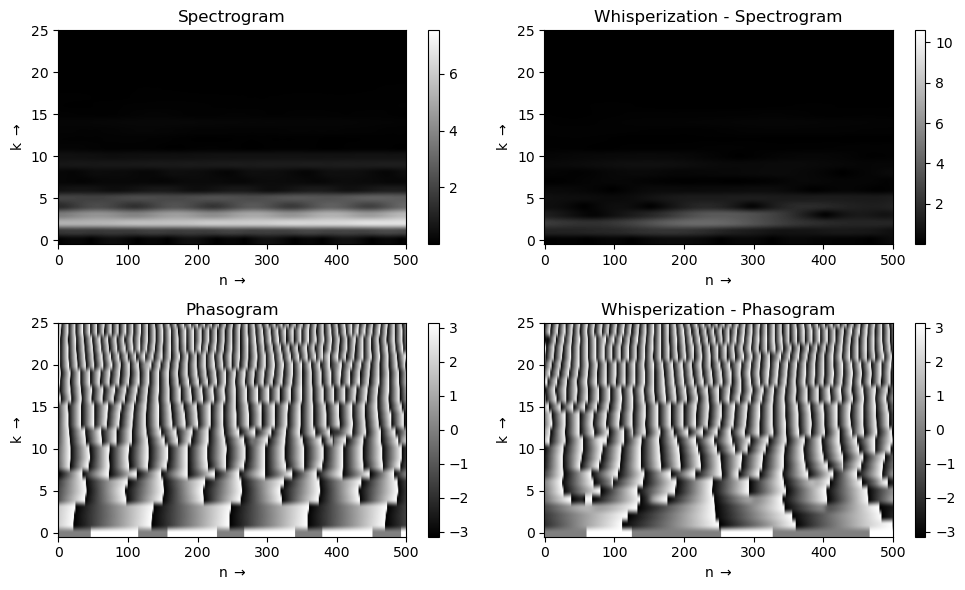

In [6]:
inputFile = 'audios\\flute2.wav'

x, fs = af.read(inputFile)
auxName = inputFile.split('.wav')[0]

y = VX_whisper(x)
af.write(auxName+'_whisper.wav',y,fs)

lenX = range(3000,3800)
lenFFT = 256
win= sig.windows.hann(256,False)

X = np.zeros((len(lenX),lenFFT),dtype='complex128')
Y = np.zeros((len(lenX),lenFFT),dtype='complex128')

i=0
for n in lenX:
    grain = x[n:n+len(win)] * win
    X[i,:] = np.fft.fft(np.fft.fftshift(grain),n=lenFFT); # FFT
    grain = y[n:n+len(win)] * win
    Y[i,:] = np.fft.fft(np.fft.fftshift(grain),n=lenFFT); # FFT
    i = i+1

kcut=25
xmax =500
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.imshow(np.abs(X.T), cmap='gray', extent=[-0.5, len(lenX)-0.5, -0.5, lenFFT-0.5], aspect='auto', origin='lower')
plt.title('Spectrogram')
plt.ylabel(r'k $\rightarrow$')
plt.xlabel(r'n $\rightarrow$')
plt.axis(ymax=kcut, xmax=xmax)
plt.colorbar()
plt.subplot(223)
plt.imshow(np.angle(X.T), cmap='gray', extent=[-0.5, len(lenX)-0.5, -0.5, lenFFT-0.5], aspect='auto', origin='lower')
plt.title('Phasogram')
plt.ylabel(r'k $\rightarrow$')
plt.xlabel(r'n $\rightarrow$')
plt.axis(ymax=kcut, xmax=xmax)
plt.colorbar()
plt.subplot(222)
plt.imshow(np.abs(Y.T), cmap='gray', extent=[-0.5, len(lenX)-0.5, -0.5, lenFFT-0.5], aspect='auto', origin='lower')
plt.title('Whisperization - Spectrogram')
plt.ylabel(r'k $\rightarrow$')
plt.xlabel(r'n $\rightarrow$')
plt.axis(ymax=kcut, xmax=xmax)
plt.colorbar()
plt.subplot(224)
plt.imshow(np.angle(Y.T), cmap='gray', extent=[-0.5, len(lenX)-0.5, -0.5, lenFFT-0.5], aspect='auto', origin='lower')
plt.title('Whisperization - Phasogram')
plt.ylabel(r'k $\rightarrow$')
plt.xlabel(r'n $\rightarrow$')
plt.axis(ymax=kcut, xmax=xmax)
plt.colorbar()



plt.tight_layout()
plt.show()

Elapsed time is 0.331806 seconds.


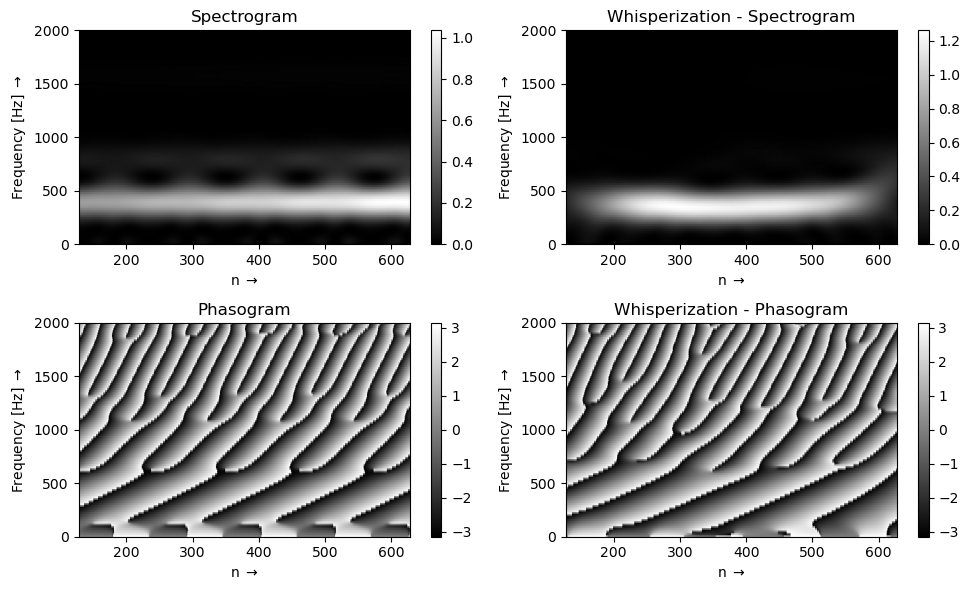

In [7]:
inputFile = 'audios\\flute2.wav'

x, fs = af.read(inputFile)
auxName = inputFile.split('.wav')[0]

y = VX_whisper(x)
af.write(auxName+'_whisper.wav',y,fs)

lenX = range(3000,3756)
lenFFT = 2048
win= sig.windows.hann(256,False)
fx, tx, Sxx = sig.spectrogram(x[lenX], window=win, nfft=lenFFT, noverlap=len(win)-1)
fxph, txph, Sxxph = sig.spectrogram(x[lenX], window=win, nfft=lenFFT, noverlap=len(win)-1,mode='angle')
fy, ty, Syy = sig.spectrogram(y[lenX], window=win, nfft=lenFFT, noverlap=len(win)-1)
fyph, typh, Syyph = sig.spectrogram(y[lenX], window=win, nfft=lenFFT, noverlap=len(win)-1,mode='angle')

fcut=2000
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.pcolormesh(tx, fx*fs, Sxx, shading='gouraud',cmap='gray')
plt.title('Spectrogram')
plt.ylabel('Frequency [Hz]'+r' $\rightarrow$')
plt.xlabel(r'n $\rightarrow$')
plt.axis(ymax=fcut)
plt.colorbar()
plt.subplot(222)
plt.pcolormesh(ty, fy*fs, Syy, shading='gouraud',cmap='gray')
plt.title('Whisperization - Spectrogram')
plt.ylabel('Frequency [Hz]'+r' $\rightarrow$')
plt.xlabel(r'n $\rightarrow$')
plt.axis(ymax=fcut)
plt.colorbar()
plt.subplot(223)
plt.pcolormesh(txph, fxph*fs, Sxxph, shading='gouraud',cmap='gray')
plt.title('Phasogram')
plt.ylabel('Frequency [Hz]'+r' $\rightarrow$')
plt.xlabel(r'n $\rightarrow$')
plt.axis(ymax=fcut)
plt.colorbar()
plt.subplot(224)
plt.pcolormesh(typh, fyph*fs, Syyph, shading='gouraud',cmap='gray')
plt.title('Whisperization - Phasogram')
plt.ylabel('Frequency [Hz]'+r' $\rightarrow$')
plt.xlabel(r'n $\rightarrow$')
plt.axis(ymax=fcut)
plt.colorbar()
plt.tight_layout()
plt.show()